#GAN Implementation



In [1]:
!pip install torch torchvision matplotlib

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the dataset
batch_size = 64
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('.', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.2MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28.9k/28.9k [00:00<00:00, 519kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.46MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4.54k/4.54k [00:00<00:00, 11.5MB/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [4]:
class Generator(nn.Module):
    def __init__(self, input_dim=100, output_dim=784):
        super(Generator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.fc(x)

class Discriminator(nn.Module):
    def __init__(self, input_dim=784):
        super(Discriminator, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.fc(x)

In [5]:
z_dim = 100  # Dimension of the noise vector
generator = Generator(input_dim=z_dim).to(device)
discriminator = Discriminator().to(device)

# Optimizers
lr = 0.0002
G_optimizer = optim.Adam(generator.parameters(), lr=lr)
D_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

Epoch [1/100] | D Loss: 1.0842 | G Loss: 2.2819
Epoch [2/100] | D Loss: 0.9872 | G Loss: 1.5734
Epoch [3/100] | D Loss: 0.5595 | G Loss: 2.6246
Epoch [4/100] | D Loss: 0.6321 | G Loss: 2.2694
Epoch [5/100] | D Loss: 0.7284 | G Loss: 2.0022
Epoch [6/100] | D Loss: 0.6649 | G Loss: 2.2041
Epoch [7/100] | D Loss: 0.7820 | G Loss: 1.9581
Epoch [8/100] | D Loss: 0.7919 | G Loss: 1.8657
Epoch [9/100] | D Loss: 0.8096 | G Loss: 1.8304
Epoch [10/100] | D Loss: 0.8380 | G Loss: 1.7971


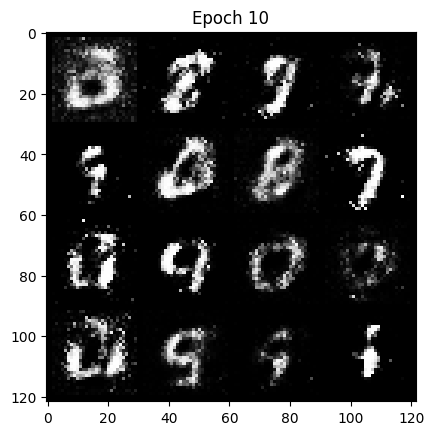

Epoch [11/100] | D Loss: 0.8541 | G Loss: 1.7308
Epoch [12/100] | D Loss: 0.8669 | G Loss: 1.6834
Epoch [13/100] | D Loss: 0.9203 | G Loss: 1.5790
Epoch [14/100] | D Loss: 0.9094 | G Loss: 1.5948
Epoch [15/100] | D Loss: 0.9390 | G Loss: 1.5124
Epoch [16/100] | D Loss: 0.9638 | G Loss: 1.4709
Epoch [17/100] | D Loss: 0.9894 | G Loss: 1.4186
Epoch [18/100] | D Loss: 1.0283 | G Loss: 1.3286
Epoch [19/100] | D Loss: 1.0125 | G Loss: 1.3671
Epoch [20/100] | D Loss: 1.0180 | G Loss: 1.3494


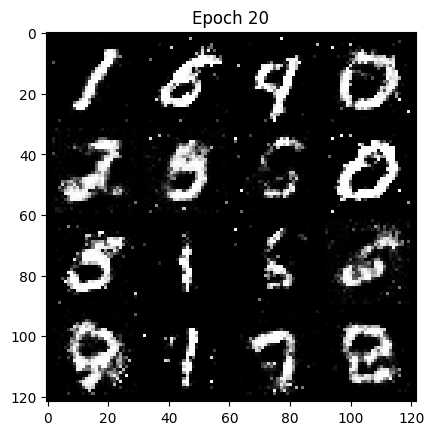

Epoch [21/100] | D Loss: 1.0503 | G Loss: 1.3074
Epoch [22/100] | D Loss: 1.0553 | G Loss: 1.2733
Epoch [23/100] | D Loss: 1.0797 | G Loss: 1.2385
Epoch [24/100] | D Loss: 1.0983 | G Loss: 1.2121
Epoch [25/100] | D Loss: 1.0919 | G Loss: 1.2164
Epoch [26/100] | D Loss: 1.1268 | G Loss: 1.1434
Epoch [27/100] | D Loss: 1.1431 | G Loss: 1.1215
Epoch [28/100] | D Loss: 1.1554 | G Loss: 1.1008
Epoch [29/100] | D Loss: 1.1592 | G Loss: 1.0879
Epoch [30/100] | D Loss: 1.1733 | G Loss: 1.0685


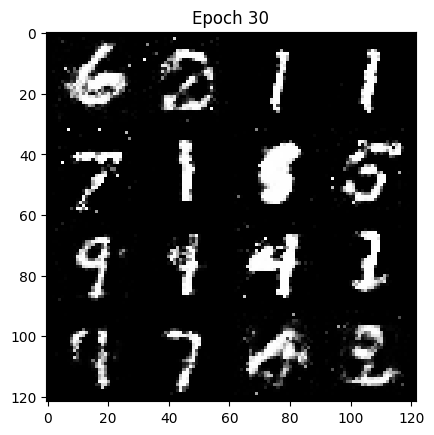

Epoch [31/100] | D Loss: 1.1784 | G Loss: 1.0613
Epoch [32/100] | D Loss: 1.1816 | G Loss: 1.0438
Epoch [33/100] | D Loss: 1.1753 | G Loss: 1.0673
Epoch [34/100] | D Loss: 1.1859 | G Loss: 1.0354
Epoch [35/100] | D Loss: 1.1873 | G Loss: 1.0469
Epoch [36/100] | D Loss: 1.2013 | G Loss: 1.0252
Epoch [37/100] | D Loss: 1.2071 | G Loss: 1.0037
Epoch [38/100] | D Loss: 1.2066 | G Loss: 1.0061
Epoch [39/100] | D Loss: 1.2170 | G Loss: 0.9917
Epoch [40/100] | D Loss: 1.2178 | G Loss: 0.9819


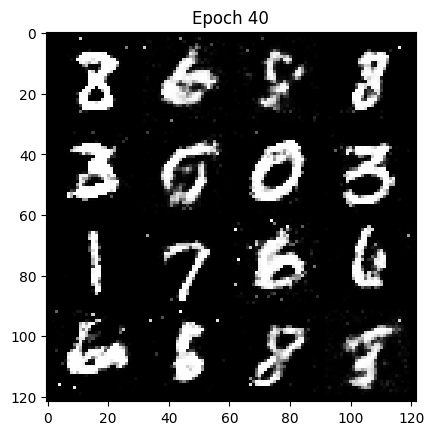

Epoch [41/100] | D Loss: 1.2244 | G Loss: 0.9784
Epoch [42/100] | D Loss: 1.2245 | G Loss: 0.9883
Epoch [43/100] | D Loss: 1.2294 | G Loss: 0.9724
Epoch [44/100] | D Loss: 1.2350 | G Loss: 0.9663
Epoch [45/100] | D Loss: 1.2281 | G Loss: 0.9725
Epoch [46/100] | D Loss: 1.2355 | G Loss: 0.9661
Epoch [47/100] | D Loss: 1.2231 | G Loss: 0.9816
Epoch [48/100] | D Loss: 1.2263 | G Loss: 0.9739
Epoch [49/100] | D Loss: 1.2393 | G Loss: 0.9519
Epoch [50/100] | D Loss: 1.2464 | G Loss: 0.9434


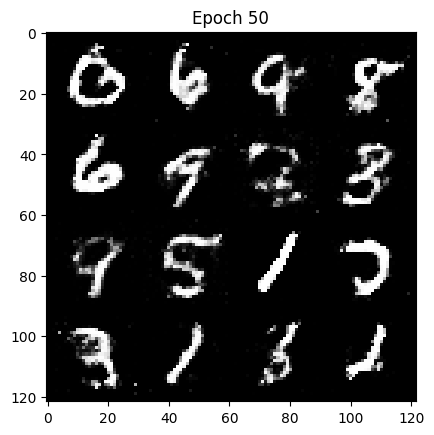

Epoch [51/100] | D Loss: 1.2385 | G Loss: 0.9524
Epoch [52/100] | D Loss: 1.2486 | G Loss: 0.9456
Epoch [53/100] | D Loss: 1.2500 | G Loss: 0.9417
Epoch [54/100] | D Loss: 1.2564 | G Loss: 0.9275
Epoch [55/100] | D Loss: 1.2572 | G Loss: 0.9243
Epoch [56/100] | D Loss: 1.2520 | G Loss: 0.9448
Epoch [57/100] | D Loss: 1.2535 | G Loss: 0.9384
Epoch [58/100] | D Loss: 1.2615 | G Loss: 0.9157
Epoch [59/100] | D Loss: 1.2603 | G Loss: 0.9274
Epoch [60/100] | D Loss: 1.2611 | G Loss: 0.9225


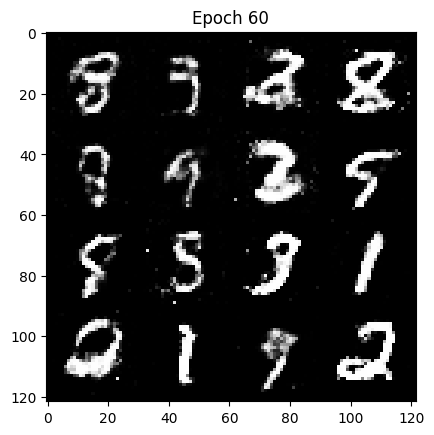

Epoch [61/100] | D Loss: 1.2562 | G Loss: 0.9216
Epoch [62/100] | D Loss: 1.2612 | G Loss: 0.9301
Epoch [63/100] | D Loss: 1.2639 | G Loss: 0.9168
Epoch [64/100] | D Loss: 1.2664 | G Loss: 0.9072
Epoch [65/100] | D Loss: 1.2623 | G Loss: 0.9188
Epoch [66/100] | D Loss: 1.2557 | G Loss: 0.9283
Epoch [67/100] | D Loss: 1.2663 | G Loss: 0.9107
Epoch [68/100] | D Loss: 1.2661 | G Loss: 0.9111
Epoch [69/100] | D Loss: 1.2667 | G Loss: 0.9083
Epoch [70/100] | D Loss: 1.2652 | G Loss: 0.9133


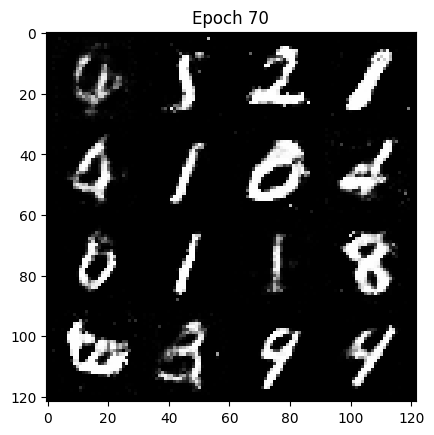

Epoch [71/100] | D Loss: 1.2637 | G Loss: 0.9161
Epoch [72/100] | D Loss: 1.2640 | G Loss: 0.9136
Epoch [73/100] | D Loss: 1.2722 | G Loss: 0.9023
Epoch [74/100] | D Loss: 1.2669 | G Loss: 0.9104
Epoch [75/100] | D Loss: 1.2670 | G Loss: 0.9040
Epoch [76/100] | D Loss: 1.2728 | G Loss: 0.8935
Epoch [77/100] | D Loss: 1.2755 | G Loss: 0.8956
Epoch [78/100] | D Loss: 1.2739 | G Loss: 0.8932
Epoch [79/100] | D Loss: 1.2750 | G Loss: 0.8938
Epoch [80/100] | D Loss: 1.2790 | G Loss: 0.8900


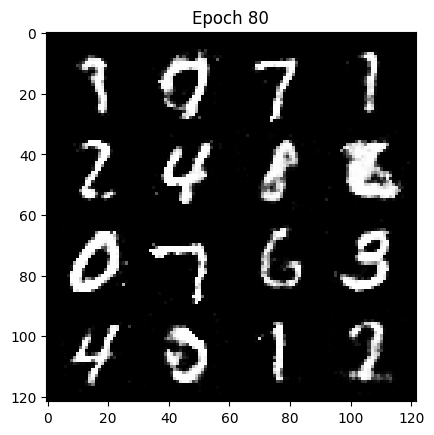

Epoch [81/100] | D Loss: 1.2757 | G Loss: 0.8948
Epoch [82/100] | D Loss: 1.2732 | G Loss: 0.9021
Epoch [83/100] | D Loss: 1.2732 | G Loss: 0.8931
Epoch [84/100] | D Loss: 1.2817 | G Loss: 0.8795
Epoch [85/100] | D Loss: 1.2799 | G Loss: 0.8864
Epoch [86/100] | D Loss: 1.2796 | G Loss: 0.8927
Epoch [87/100] | D Loss: 1.2809 | G Loss: 0.8822
Epoch [88/100] | D Loss: 1.2812 | G Loss: 0.8887
Epoch [89/100] | D Loss: 1.2733 | G Loss: 0.8988
Epoch [90/100] | D Loss: 1.2814 | G Loss: 0.8837


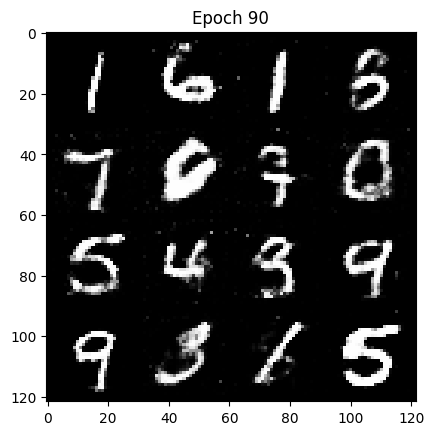

Epoch [91/100] | D Loss: 1.2766 | G Loss: 0.8962
Epoch [92/100] | D Loss: 1.2801 | G Loss: 0.8850
Epoch [93/100] | D Loss: 1.2828 | G Loss: 0.8805
Epoch [94/100] | D Loss: 1.2875 | G Loss: 0.8740
Epoch [95/100] | D Loss: 1.2777 | G Loss: 0.8889
Epoch [96/100] | D Loss: 1.2836 | G Loss: 0.8793
Epoch [97/100] | D Loss: 1.2827 | G Loss: 0.8827
Epoch [98/100] | D Loss: 1.2836 | G Loss: 0.8820
Epoch [99/100] | D Loss: 1.2797 | G Loss: 0.8883
Epoch [100/100] | D Loss: 1.2793 | G Loss: 0.8813


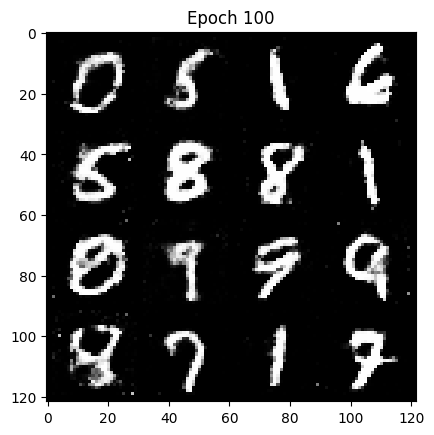

In [6]:
def train_discriminator(real_images, fake_images):
    # Train on real images
    D_optimizer.zero_grad()
    real_labels = torch.ones(real_images.size(0), 1).to(device)
    real_loss = criterion(discriminator(real_images), real_labels)

    # Train on fake images
    fake_labels = torch.zeros(fake_images.size(0), 1).to(device)
    fake_loss = criterion(discriminator(fake_images), fake_labels)

    # Backprop and optimize
    D_loss = real_loss + fake_loss
    D_loss.backward()
    D_optimizer.step()

    return D_loss.item()

def train_generator(fake_images):
    # Train generator to make discriminator classify fake images as real
    G_optimizer.zero_grad()
    labels = torch.ones(fake_images.size(0), 1).to(device)
    G_loss = criterion(discriminator(fake_images), labels)

    # Backprop and optimize
    G_loss.backward()
    G_optimizer.step()

    return G_loss.item()

# Training parameters
epochs = 100
sample_interval = 10
D_losses, G_losses = [], []

for epoch in range(epochs):
    D_loss_epoch, G_loss_epoch = 0, 0
    for batch_idx, (real_images, _) in enumerate(train_loader):
        # Flatten real images
        real_images = real_images.view(-1, 784).to(device)

        # Generate fake images
        z = torch.randn(batch_size, z_dim).to(device)
        fake_images = generator(z)

        # Train discriminator and generator
        D_loss_epoch += train_discriminator(real_images, fake_images.detach())
        G_loss_epoch += train_generator(fake_images)

    # Calculate average losses for the epoch
    D_losses.append(D_loss_epoch / len(train_loader))
    G_losses.append(G_loss_epoch / len(train_loader))

    # Print progress
    print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {D_losses[-1]:.4f} | G Loss: {G_losses[-1]:.4f}")

    # Save samples at intervals
    if (epoch + 1) % sample_interval == 0:
        with torch.no_grad():
            z = torch.randn(16, z_dim).to(device)
            generated_images = generator(z).view(-1, 1, 28, 28)
            grid_img = torchvision.utils.make_grid(generated_images, nrow=4, normalize=True)
            plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy())
            plt.title(f"Epoch {epoch+1}")
            plt.show()

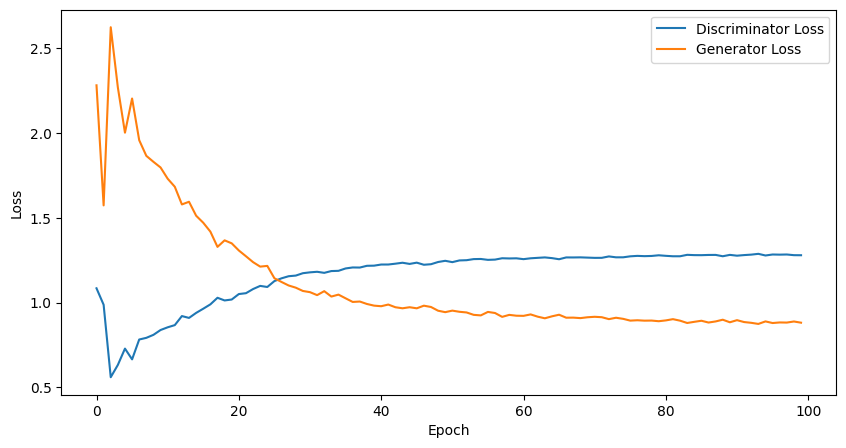

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(D_losses, label="Discriminator Loss")
plt.plot(G_losses, label="Generator Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

 # Latent Space Interpolation in GANs

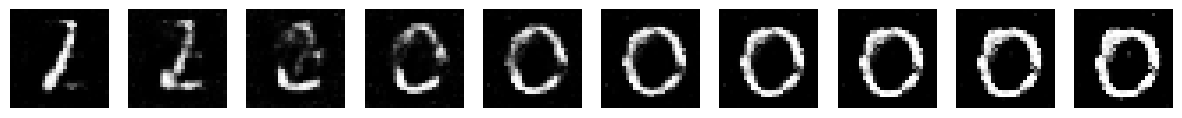

In [10]:
import numpy as np

def interpolate(z1, z2, steps=10):
    """Generate a series of interpolated latent vectors between z1 and z2."""
    return [(1 - alpha) * z1 + alpha * z2 for alpha in np.linspace(0, 1, steps)]

# Function to visualize interpolated images
def visualize_interpolation(generator, z_dim, steps=10):
    # Generate two random latent vectors
    z1 = torch.randn(1, z_dim).to(device)
    z2 = torch.randn(1, z_dim).to(device)

    # Interpolate between z1 and z2
    interpolated_latents = interpolate(z1, z2, steps=steps)

    # Generate images from each interpolated latent vector
    generated_images = [generator(latent).view(1, 28, 28).detach().cpu() for latent in interpolated_latents]

    # Plot the interpolated images
    fig, axes = plt.subplots(1, steps, figsize=(15, 15))
    for i, img in enumerate(generated_images):
        img = img * 0.5 + 0.5  # Rescale image to [0, 1] for visualization
        axes[i].imshow(img.squeeze(), cmap="gray")
        axes[i].axis("off")
    plt.show()

# After training, visualize interpolation between two generated images
visualize_interpolation(generator, z_dim=100, steps=10)